In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [5]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [6]:
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [7]:
test_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


## 타이타닉데이터 합쳐서 분석하기
- Name 이라는 피쳐가 결혼유무나 성별을 확인할 수 있는 하나의 피쳐로도 바라볼 수 있다.
- 이 피쳐를 통해 우리가 결혼이나 다른 피쳐를 추가해서 만들 수 있다.
- Name 어떤 식으로 가공할까?
- 문자열, 정규표현식 이용해서 피쳐 가공 가능
- 정규표현식을 이용한 피쳐 가공 (Name 피쳐)

In [8]:
train_df = train_df.drop(['Ticket', 'Cabin'], axis=1)
test_df = test_df.drop(['Ticket', 'Cabin'], axis=1)
combine = [train_df, test_df]

In [9]:
combine

[     PassengerId  Survived  Pclass  \
 0              1         0       3   
 1              2         1       1   
 2              3         1       3   
 3              4         1       1   
 4              5         0       3   
 ..           ...       ...     ...   
 886          887         0       2   
 887          888         1       1   
 888          889         0       3   
 889          890         1       1   
 890          891         0       3   
 
                                                   Name     Sex   Age  SibSp  \
 0                              Braund, Mr. Owen Harris    male  22.0      1   
 1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
 2                               Heikkinen, Miss. Laina  female  26.0      0   
 3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
 4                             Allen, Mr. William Henry    male  35.0      0   
 ..                                               

# Name 컬럼 전처리
- str 문법
- 문자열 데이터에 대한 전처리 작업 진행시 사용해
- 시리즈, 데이터프레임으로 잡고 .str.원하는문법 ( extract, 여러가지가 있다. findall)
- 정규표현식을 사용할 예정이니, (정규표현식을 넣을 예정)

In [10]:
for df in combine:
    df['Name_re'] = df.Name.str.extract(' ([A-Za-z]+)\.', expand=True) 

In [11]:
# 실제 성별과 Name_re 만든 피처가 실제 잘 매핑이 되었는지 간단한 검증?
# 판다스에서 제공하는 crosstab() 피벗테이블의 개념 엑셀의 개념으로

pd.crosstab(train_df['Name_re'],train_df['Sex']) #다른 피처넣어보면서 어떤 관계인지는 확인해 보시면 좋다.

Sex,female,male
Name_re,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


- 그냥 그대로 다 가지고 가면 피처의 값들의 범위가 너무 넒어지고 의미 없이 피처가 만들어지는 것과 같다
- 그래서 이름을 구간화해서 묶어주어야함.

In [12]:
# replace 파이썬 기초문법
for df in combine:
    df['Name_re'] = df['Name_re'].replace(['Lady','Countess','Col','Don','Dr','Major','Rev','Sir','Jonkheer','Dona'],'Rare')
    df['Name_re'] = df['Name_re'].replace('Mlle','Miss')
    df['Name_re'] = df['Name_re'].replace('Ms','Miss')
    df['Name_re'] = df['Name_re'].replace('Mme','Miss')


In [13]:
train_df[['Name_re','Survived']].groupby(['Name_re'],as_index=False).mean()

,Name_re,Survived
0,Capt,0.000000
1,Master,0.575000
2,Miss,0.704301
3,Mr,0.156673
4,Mrs,0.792000
5,Rare,0.363636


In [14]:
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Name_re
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,Mr
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,13.0000,S,Rare
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,30.0000,S,Miss
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,23.4500,S,Miss
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,30.0000,C,Mr


- Name_re 에서 나온 값들을 -> 수치로 변경하는 것
- 인코딩 작업
- 레이블인코딩, 원핫인코딩, 그외에 인코딩도 많지만 대표적으로 이 두 가지

- 레이블인코딩 : 1,2,3,4,5,6 해당 값에 순서를 매칭해서 변경해 준다. Mr 1 Mrs 2, Rare 3, Miss 4 등등
- 원핫인코딩 : 0,1로만 피처를 만들어 준다.
- Mr, Mrs, Rare, Miss 컬럼으로 만들어 준다.
- 이 컬럼에 대응하는 값이 0,1 인지를 인덱스기준으로 매핑한다.

In [15]:
# 레이블인코딩으로 변환
name_re = {'Mr':1, 'Miss':2, 'Mrs':3, 'Master':4,'Rare':5}

for df in combine:
    df['Name_re'] = df['Name_re'].map(name_re) #map함수와 판다스의 시리즈가 만나서 해당 값으로 변환해 준다.
    df['Name_re'] = df['Name_re'].fillna(0)



In [16]:
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Name_re
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,3.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,2.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,3.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1.0
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,13.0000,S,5.0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,30.0000,S,2.0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,23.4500,S,2.0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,30.0000,C,1.0


# Sex 컬럼 전처리
## 원핫인코딩의 개념으로

- Sex 를 전처리하기 딱 좋은 Male, Female -> 0,1 생존확률이 높은 사람은 여성이었고, 여성을 1, 남성을 0

In [17]:
#전처리 후 남은 사용한 컬럼은 제거
train_df = train_df.drop(['Name','PassengerId'], axis=1)
test_df = test_df.drop(['Name'], axis=1)
combine = [train_df, test_df]

In [18]:
for df in combine:
    df['Sex'] = df['Sex'].map({'female':1, 'male':0}).astype(int)

In [19]:
df['Sex'].value_counts()

Sex
0    266
1    152
Name: count, dtype: int64

In [20]:
train_df.isna().sum() #null값

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
Name_re       0
dtype: int64

# age 컬럼 전처리
- Missing Value 대체하는 방법
- MICE
- 보간법
- 단순한 기초통계치로 대체하는 법
- KNN, ML 기법을 통해서 대체하는 법

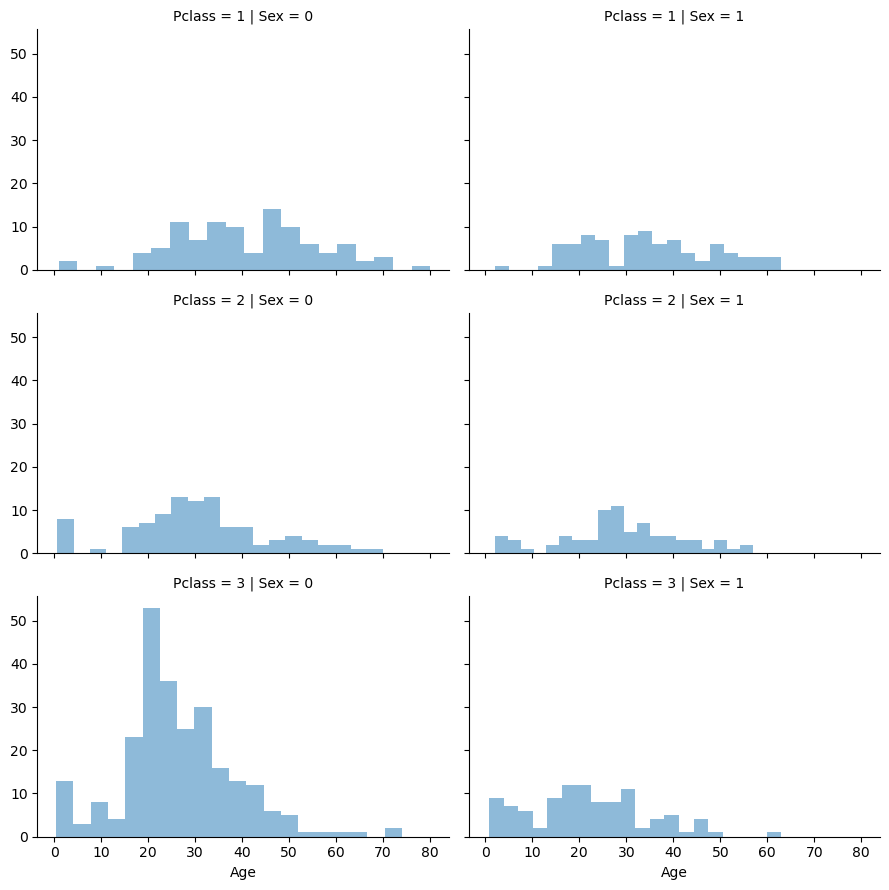

In [21]:
grid = sns.FacetGrid(train_df, row='Pclass', col='Sex', aspect =1.5)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)

이후는 휴회기간 끝나고 설명 다시 해주신다 하심.

- 단순하게 Age 평균으로 대체하면 -> Median
- Pclass, Sex 따라서 2차원으로 나눈 후 -> 그 값들의 Median, Mean 대체를 한다.

In [22]:
guess_ages = np.zeros((2,3)) # np.zeros 0값 넣는다. 일단 na값을 채워넣을 주머니 하나 만들었다.

In [23]:
## 결측치를 채울 코드는?
## pclass, 성별 2 두가지의 차원으로 결측치를 바라볼 것
## 두 가지의 피처로 값을 추출하면서 이 값의 median의 값을 -> guess_ages 넣어서 대체하면 된다.
## age는 22.1살 22.7살 없다. 반올림을 하는 작업을 진행해야 한다.

for df in combine:
    for i in range(0,2):
        for j in range(0,3):
            guess_df = df[(df['Sex']==i) & (df['Pclass']==j+1)]['Age'].dropna()

            age_guess = guess_df.median()
            guess_ages[i,j] = (age_guess/0.5 + 0.5) * 0.5


    for i in range(0,2):
        for j in range(0,3):
            df.loc[(df.Age.isnull()) & (df.Sex ==i)&(df.Pclass==j+1), 'Age'] = guess_ages[i,j]
    df['Age'] = df['Age'].astype(int)

In [24]:
train_df.Age.isna().sum()

0

In [25]:
#0504
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Name_re
0,0,3,0,22,1,0,7.2500,S,1.0
1,1,1,1,38,1,0,71.2833,C,3.0
2,1,3,1,26,0,0,7.9250,S,2.0
3,1,1,1,35,1,0,53.1000,S,3.0
4,0,3,0,35,0,0,8.0500,S,1.0


### age 데이터 범위가 넓다
왜 구간을 나누고 계속해서 전처리를 하는지?
- 판다스 문법을 통해 쉽게 구간을 나눌 수 있다.
- cut, qcut(나누는 개념)

In [26]:
train_df.Age.value_counts()

Age
25    117
21     66
30     36
40     36
24     31
     ... 
12      1
53      1
80      1
66      1
74      1
Name: count, Length: 71, dtype: int64

In [27]:
max(train_df['Age'])

80

In [28]:
#나이에 대한 범주한 값
train_df['Agerange']=pd.cut(train_df['Age'],5)

In [29]:
train_df[['Agerange','Survived']].groupby(['Agerange'],as_index=False).mean().sort_values(by='Agerange',ascending=False)

C:\Users\pitap\AppData\Local\Temp\ipykernel_22092\2765417758.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  train_df[['Agerange','Survived']].groupby(['Agerange'],as_index=False).mean().sort_values(by='Agerange',ascending=False)


,Agerange,Survived
4,"(64.0, 80.0]",0.090909
3,"(48.0, 64.0]",0.434783
2,"(32.0, 48.0]",0.412037
1,"(16.0, 32.0]",0.337374
0,"(-0.08, 16.0]",0.550000


####age->인코딩하는 작업으로 데이터 전처리

In [30]:
train_df

for df in combine:
    df.loc[df['Age']<=16, 'Age'] = 0
    df.loc[(df['Age']>16) & (df['Age']<=32), 'Age']=1
    df.loc[(df['Age']>32) & (df['Age']<=48), 'Age']=2
    df.loc[(df['Age']>48) & (df['Age']<=64), 'Age']=3
    df.loc[df['Age']>64, 'Age'] = 4

    
#위의 pd.cut 구간으로 인코딩 진행완료

In [31]:
train_df.Age.value_counts()

Age
1    495
2    216
0    100
3     69
4     11
Name: count, dtype: int64

In [32]:
train_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Name_re,Agerange
0,0,3,0,1,1,0,7.2500,S,1.0,"(16.0, 32.0]"
1,1,1,1,2,1,0,71.2833,C,3.0,"(32.0, 48.0]"
2,1,3,1,1,0,0,7.9250,S,2.0,"(16.0, 32.0]"
3,1,1,1,2,1,0,53.1000,S,3.0,"(32.0, 48.0]"
4,0,3,0,2,0,0,8.0500,S,1.0,"(32.0, 48.0]"
...,...,...,...,...,...,...,...,...,...,...
886,0,2,0,1,0,0,13.0000,S,5.0,"(16.0, 32.0]"
887,1,1,1,1,0,0,30.0000,S,2.0,"(16.0, 32.0]"
888,0,3,1,1,1,2,23.4500,S,2.0,"(16.0, 32.0]"
889,1,1,0,1,0,0,30.0000,C,1.0,"(16.0, 32.0]"


## sibsp, parch
- 두 개 컬럼이 가족과 관련한 동승자와 관련한 컬럼
- 이 두 가지를 합쳐서 새로운 컬럼을 만들고 그 컬럼을 통해 피처 가공
- 이 두 가지를 합쳐서 -> 새로운 하나의 파생변수 FamilySize 만듦

In [33]:
for dataset in combine:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] +1

In [34]:
combine

[     Survived  Pclass  Sex  Age  SibSp  Parch     Fare Embarked  Name_re  \
 0           0       3    0    1      1      0   7.2500        S      1.0   
 1           1       1    1    2      1      0  71.2833        C      3.0   
 2           1       3    1    1      0      0   7.9250        S      2.0   
 3           1       1    1    2      1      0  53.1000        S      3.0   
 4           0       3    0    2      0      0   8.0500        S      1.0   
 ..        ...     ...  ...  ...    ...    ...      ...      ...      ...   
 886         0       2    0    1      0      0  13.0000        S      5.0   
 887         1       1    1    1      0      0  30.0000        S      2.0   
 888         0       3    1    1      1      2  23.4500        S      2.0   
 889         1       1    0    1      0      0  30.0000        C      1.0   
 890         0       3    0    1      0      0   7.7500        Q      1.0   
 
          Agerange  FamilySize  
 0    (16.0, 32.0]           2  
 1    (3

In [35]:
for dataset in combine:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] +1

In [36]:
for dataset in combine:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] +1 # 가족과 관련된 컬럼 -> 패밀리 수치로 바꿈 

combine[0][['FamilySize','Survived']].groupby(['FamilySize'],as_index=False).mean().sort_values(by='Survived',ascending=False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


In [37]:
combine

[     Survived  Pclass  Sex  Age  SibSp  Parch     Fare Embarked  Name_re  \
 0           0       3    0    1      1      0   7.2500        S      1.0   
 1           1       1    1    2      1      0  71.2833        C      3.0   
 2           1       3    1    1      0      0   7.9250        S      2.0   
 3           1       1    1    2      1      0  53.1000        S      3.0   
 4           0       3    0    2      0      0   8.0500        S      1.0   
 ..        ...     ...  ...  ...    ...    ...      ...      ...      ...   
 886         0       2    0    1      0      0  13.0000        S      5.0   
 887         1       1    1    1      0      0  30.0000        S      2.0   
 888         0       3    1    1      1      2  23.4500        S      2.0   
 889         1       1    0    1      0      0  30.0000        C      1.0   
 890         0       3    0    1      0      0   7.7500        Q      1.0   
 
          Agerange  FamilySize  
 0    (16.0, 32.0]           2  
 1    (3

In [38]:
for dataset in combine:
    dataset['IsAlone'] =0
    dataset.loc[dataset['FamilySize']==1 , 'IsAlone'] =1

In [39]:
combine[0][['IsAlone','Survived']].groupby(['IsAlone'], as_index=False).mean()

,IsAlone,Survived
0,0,0.505650
1,1,0.303538


In [40]:
combine[1]

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Name_re,FamilySize,IsAlone
0,892,3,0,2,0,0,7.8292,Q,1,1,1
1,893,3,1,2,1,0,7.0000,S,3,2,0
2,894,2,0,3,0,0,9.6875,Q,1,1,1
3,895,3,0,1,0,0,8.6625,S,1,1,1
4,896,3,1,1,1,1,12.2875,S,3,3,0
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,0,1,0,0,8.0500,S,1,1,1
414,1306,1,1,2,0,0,108.9000,C,5,1,1
415,1307,3,0,2,0,0,7.2500,S,1,1,1
416,1308,3,0,1,0,0,8.0500,S,1,1,1


In [41]:
#train_df에 우리가 만든 파생변수를 같이 넣자
train_df=combine[0].drop(['Agerange','SibSp','Parch'],axis=1)
test_df= combine[1].drop(['SibSp','Parch'],axis=1)

In [42]:
combine[1]

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Name_re,FamilySize,IsAlone
0,892,3,0,2,0,0,7.8292,Q,1,1,1
1,893,3,1,2,1,0,7.0000,S,3,2,0
2,894,2,0,3,0,0,9.6875,Q,1,1,1
3,895,3,0,1,0,0,8.6625,S,1,1,1
4,896,3,1,1,1,1,12.2875,S,3,3,0
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,0,1,0,0,8.0500,S,1,1,1
414,1306,1,1,2,0,0,108.9000,C,5,1,1
415,1307,3,0,2,0,0,7.2500,S,1,1,1
416,1308,3,0,1,0,0,8.0500,S,1,1,1


In [43]:
#학습할 데이터 셋으로 정리 다시하기
combine = [train_df,test_df]

In [44]:
combine

[     Survived  Pclass  Sex  Age     Fare Embarked  Name_re  FamilySize  \
 0           0       3    0    1   7.2500        S      1.0           2   
 1           1       1    1    2  71.2833        C      3.0           2   
 2           1       3    1    1   7.9250        S      2.0           1   
 3           1       1    1    2  53.1000        S      3.0           2   
 4           0       3    0    2   8.0500        S      1.0           1   
 ..        ...     ...  ...  ...      ...      ...      ...         ...   
 886         0       2    0    1  13.0000        S      5.0           1   
 887         1       1    1    1  30.0000        S      2.0           1   
 888         0       3    1    1  23.4500        S      2.0           4   
 889         1       1    0    1  30.0000        C      1.0           1   
 890         0       3    0    1   7.7500        Q      1.0           1   
 
      IsAlone  
 0          0  
 1          0  
 2          1  
 3          0  
 4          1  
 .

## Age 컬럼이랑 Pclass 가지고 새로운 변수로 만들기 
- 나이와 타이타닉의 선박의 등급이랑 두 개의 갑을 곱해서 하나의 파생변수 만들었다.

In [45]:
for dataset in combine:
    dataset['Age*Pclass'] = dataset.Age * dataset.Pclass

In [46]:
train_df.loc[:, ['Age*Pclass', 'Age','Pclass']]

,Age*Pclass,Age,Pclass
0,3,1,3
1,2,2,1
2,3,1,3
3,2,2,1
4,6,2,3
...,...,...,...
886,2,1,2
887,1,1,1
888,3,1,3
889,1,1,1


In [47]:
train_df.isna().sum()

Survived      0
Pclass        0
Sex           0
Age           0
Fare          0
Embarked      2
Name_re       0
FamilySize    0
IsAlone       0
Age*Pclass    0
dtype: int64

In [48]:
freq_value=train_df['Embarked'].dropna().mode()[0] #최빈값으로 대체

In [49]:
#Embarked 데이터 전처리

for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].fillna(freq_value) # 2개의 na값이 빈도가 가장 높았던 'S'로 대체가 된다.

train_df[['Embarked','Survived']].groupby(['Embarked'],as_index=False).mean().sort_values(by='Survived',ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


In [50]:
train_df.isna().sum()

Survived      0
Pclass        0
Sex           0
Age           0
Fare          0
Embarked      0
Name_re       0
FamilySize    0
IsAlone       0
Age*Pclass    0
dtype: int64

In [51]:
# Embarked ->인코딩 작업 진행

for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].map({'S':0, 'C':1 , 'Q':2}).astype(int) #문자열 ->수치로
    
    
train_df

,Survived,Pclass,Sex,Age,Fare,Embarked,Name_re,FamilySize,IsAlone,Age*Pclass
0,0,3,0,1,7.2500,0,1.0,2,0,3
1,1,1,1,2,71.2833,1,3.0,2,0,2
2,1,3,1,1,7.9250,0,2.0,1,1,3
3,1,1,1,2,53.1000,0,3.0,2,0,2
4,0,3,0,2,8.0500,0,1.0,1,1,6
...,...,...,...,...,...,...,...,...,...,...
886,0,2,0,1,13.0000,0,5.0,1,1,2
887,1,1,1,1,30.0000,0,2.0,1,1,1
888,0,3,1,1,23.4500,0,2.0,4,0,3
889,1,1,0,1,30.0000,1,1.0,1,1,1


In [52]:
#테스트 데이터에도 na값이 fare이 있음
test_df.isna().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
Fare           1
Embarked       0
Name_re        0
FamilySize     0
IsAlone        0
Age*Pclass     0
dtype: int64

In [53]:
## test fare 요금의 결측값 대체하는 법
test_df['Fare'].fillna(test_df['Fare'].dropna().median(), inplace=True) #na값 1개를 median으로 대체

### Fare 요금도 동일하게 qcut, cut이용해서 전처리 

In [54]:
train_df['FareBand'] = pd.qcut(train_df['Fare'],4)

train_df[['FareBand','Survived']].groupby(['FareBand'],as_index=False).mean().sort_values(by='Survived',ascending=False)

C:\Users\pitap\AppData\Local\Temp\ipykernel_22092\3015270427.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  train_df[['FareBand','Survived']].groupby(['FareBand'],as_index=False).mean().sort_values(by='Survived',ascending=False)


,FareBand,Survived
3,"(31.0, 512.329]",0.581081
2,"(14.454, 31.0]",0.454955
1,"(7.91, 14.454]",0.303571
0,"(-0.001, 7.91]",0.197309


In [55]:
train_df.FareBand.value_counts()

FareBand
(7.91, 14.454]     224
(-0.001, 7.91]     223
(14.454, 31.0]     222
(31.0, 512.329]    222
Name: count, dtype: int64

In [56]:
for dataset in combine:
    dataset.loc[dataset['Fare'] <=7.91, 'Fare']= 0
    dataset.loc[(dataset['Fare']>7.91) & (dataset['Fare']<=14.454),'Fare']=1
    dataset.loc[(dataset['Fare']>14.454) & (dataset['Fare']<=31),'Fare']=2
    dataset.loc[dataset['Fare'] >31, 'Fare']= 3
    dataset['Fare'] =dataset['Fare'].astype('int')

train_df = train_df.drop(['FareBand'],axis=1)
combine = [train_df, test_df]

In [57]:
train_df

,Survived,Pclass,Sex,Age,Fare,Embarked,Name_re,FamilySize,IsAlone,Age*Pclass
0,0,3,0,1,0,0,1.0,2,0,3
1,1,1,1,2,3,1,3.0,2,0,2
2,1,3,1,1,1,0,2.0,1,1,3
3,1,1,1,2,3,0,3.0,2,0,2
4,0,3,0,2,1,0,1.0,1,1,6
...,...,...,...,...,...,...,...,...,...,...
886,0,2,0,1,1,0,5.0,1,1,2
887,1,1,1,1,2,0,2.0,1,1,1
888,0,3,1,1,2,0,2.0,4,0,3
889,1,1,0,1,2,1,1.0,1,1,1


- ### 데이터 분석 과정
- **데이터 수집** - > **데이터 전처리** -> **데이터 모델링** -> **데이터 모델링 평가** -> **적용, 전개**

- 3주동안 배웠던 과정이 -> 데이터 전처리를 배웠다.
- 무엇을 모델링 하는지?
    - 타이타닉 데이터에 대한 생존을 예측
- 독립변수 / 종속변수, 피처들에 대한 이해도가 있어야 한다.
    - 타이타닉데이터의 생존을 예측 Survived y값, label 정답!
    - 지도학습 ( 정답이 있는 데이터 )
    - 생존율은 1,0으로 이뤄진 이진 데이터
    - 연속형, 범주형 (이진, 다중) 데이터 값에 따라 모델의 사용하는 방법이 달라진다.
    - 이진분류 -> 분류 모델링을 사용하는 것
        - 이진 분류모델링 - 로지스틱회귀, Decision Tree, RandomFroest, XGBoost, CatBoost, LightGBM 기타 등등..
        - 연속형 회귀 모델링 - 선형회귀, 다중회귀, 다항회귀 등등, 분류 모델들도 다 회귀로도 모델링이 가능하다. 
        
- 모델을 사용해서 현실의 문제를 해결하기 위해서 -> 타이타닉 생존율 예측하기 위해서 필요한 기본 과정
    - 데이터를 학습시켜야 한다. 데이터를 준비해야 한다.
    - train, test, validation 데이터셋을 나눠야 한다.
    - model도 불러오거나, 직접 알고리즘을 코드로 구현하거나 등등
    - 성능을 평가해야 한다. ( 얼마나 생존율을 잘 예측하는가? )
        - 성능지표들을 알아야 한다. ( Accuracy, Recall, Precision, F1-score, AIC, BIC AUC등등.. )
        - 성능지표도 예측하는 정답에 데이터 타입에 따라 다르다.
            - 이진 분류, 다중 분류 classif -> Accuracy, Recall, Precision, F1-score, AIC, BIC AUC
            - 연속형의 경우는 -> MSE, RMSE 기타 잔차에 대한 평가 지표로 진행한다.
    - 성능을 통해 평가 후에 -> 일반화 가능한지를 검증
        - Test 데이터를 가지고 최종 결과물을 평가한 값으로 확인하는 것
    
- 모델링시 중요하게 봐야 하는 부분!
- 과소적합 -> 이 부분을 꼭 잘 체크해야 합니다.
- 과대적합 : 모델이 train 데이터에 너무 집착해서 학습하게 된 경우 -> train data 에서는 좋은 성능이 나오지만 -> test에서는 성능이 나쁘게 나오는
- 과소적합 : 모델이 너무 단순하거나, 데이터셋이 부족해서 -> train 성능이 잘 나오지 않고, test 높거나 이러한 상황들이 나오는 경우 

- 과대적합, 과소적합에 대해서 -> 어떤 값을 보고 우리가 확인해야 하는지? 
    - train, test 결과물을 통해 확인한다.
    - train, test로 비교했을 때 -> 둘의 성능 어떤 식으로 나오는 게 가장 이상적일까? 
        - 둘 다 높게 나온다?
        - 둘 다 적당하게 나온다? 
        - train 일단 높게 나와야 하고 -> 하지만 test 수능과 같이 한 번도 우리가 보지 못한 문제를 푸는 것 
        - test의 점수는 조금 train보다는 낮다. 
        - train도 높고 test도 높은 게 좋지만 -> train보다는 test가 성능이 떨어지는 것은 당연한 것
        - 둘 사이의 간극을 최대한 줄이는 그런 모델의 성능평가가 가장 좋다고 바라볼 수 있다.
        

# 모델링을 통해 성능을 비교해 보자!

### 성능의 비교는 전처리를 하기 전과 후로 비교하여 성능의 변화 값 확인!
- 둘 다 타이타닉데이터를 가지고 진행
- 원본: base , 전처리 하지 않은 원본데이터를 간단하게 가공예정
- 전처리: 우리가 3주동안 배웠던 전처리 데이터셋

- train/test로 데이터셋을 나눠야 한다.
- train/test로 데이터를 나눈 이유! 
- 데이터셋을 가지고 모델링을 하고 끝이 아니라 -> 이 데이터셋을 가지고 학습한 모델을 가지고 일반화를 통해서 다른 데이터셋이 들어왔을 때 동일하게 예측을 한다. **일반화** 일반화성능이 높아야 한다.


In [58]:
## 실제 코드로 모델링을 진행하자!
## train, test를 나누기 위해서 
## x_train, x_test, y_train, y_test ->
## x, y -> x는 독립변수 y는 종속변수, x는 생존을 제외한 다른 피처, y는 생존, 정답
## train, test 학습, 실제 일반화 하기 위한 검증 train 학습하는 모델 test train으로 테스트하고 실제 성능이 얼마나 좋은지 평가하는 데이터셋

X_train = train_df.drop('Survived', axis=1)
Y_train = train_df['Survived']

## test

X_test = test_df.drop('PassengerId',axis=1).copy()

In [59]:
# 보통 7:3, 8:2 train:test
#- sklearn. train_test_split #나누는 패키지
X_train.shape, Y_train.shape, X_test.shape

((891, 9), (891,), (418, 9))

In [60]:
from sklearn.linear_model import LogisticRegression

logreg= LogisticRegression() 
##데이터 학습
logreg.fit(X_train, Y_train)

# 미래값을 예측해야 하는 것이니 X_test
Y_pred_test=logreg.predict(X_test)

In [61]:
##train, test를 비교해야 하는데 test값으로는 성능을 비교할 수 없다 (지금 당장은 -> 정답이 없으니)
## train -> 정답을 예측했을 때 정말 성능이 높게 나오는가? 수치적으로 확인한다
## accuracy 확인해 보자! -> 정확도 실제 생존을 생존으로 예측했는지? + 실제 생존이 아닌 것을 생존이 아닌 것으로 예측했는가? / 전체 모수 

Y_pred_train=logreg.predict(X_train)

In [62]:
## train data의 정확도를 평가하기 위해서 
round(logreg.score(X_train, Y_train) *100 ,3)

81.369

In [63]:
logreg.score(X_train, Y_train)

0.813692480359147

In [64]:
Y_pred_train 

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1,

In [65]:
list(Y_train)

[0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,


In [67]:
or_train_df = pd.read_csv('train.csv')
or_test_df = pd.read_csv('test.csv')

In [68]:
or_test_df['survived']= Y_pred_test

In [69]:
or_test_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,0
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,1
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,0
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,0


In [70]:
X_test

,Pclass,Sex,Age,Fare,Embarked,Name_re,FamilySize,IsAlone,Age*Pclass
0,3,0,2,0,2,1,1,1,6
1,3,1,2,0,0,3,2,0,6
2,2,0,3,1,2,1,1,1,6
3,3,0,1,1,0,1,1,1,3
4,3,1,1,1,0,3,3,0,3
...,...,...,...,...,...,...,...,...,...
413,3,0,1,1,0,1,1,1,3
414,1,1,2,3,1,5,1,1,2
415,3,0,2,0,0,1,1,1,6
416,3,0,1,1,0,1,1,1,3
